In [1]:
import os
import numpy as np
import tensorflow as tf
import random
import matplotlib.pyplot as plt
from PIL import Image
import math

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
train_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test"

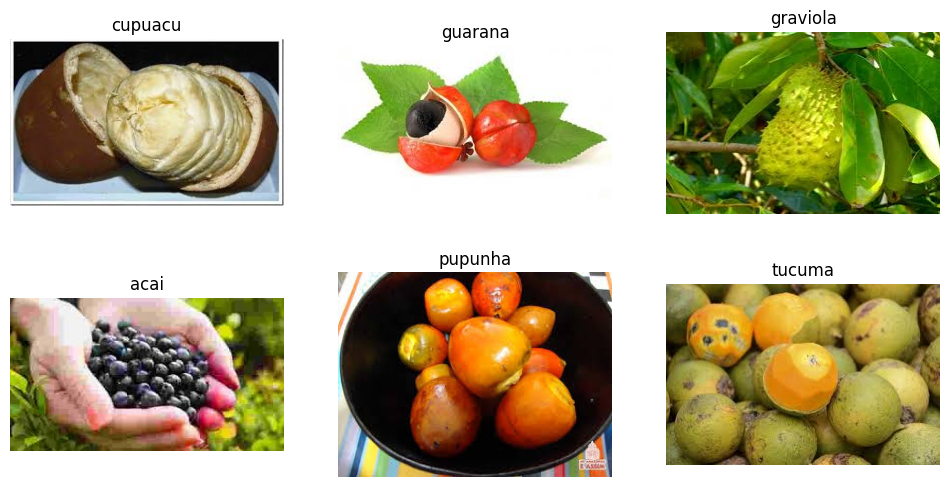

In [4]:
class_names = os.listdir(train_dir)
fig, axes = plt.subplots(2, len(class_names)//2, figsize=(12, 6))
for ax, class_name in zip(axes.flatten(), class_names):
  class_path = os.path.join(train_dir, class_name)
  img_path = random.choice(os.listdir(class_path))
  img = Image.open(os.path.join(class_path, img_path))
  ax.imshow(img)
  ax.set_title(class_name)
  ax.axis('off')
plt.show()

In [5]:
# Check both directories
for folder in [train_dir, test_dir]:
    print(f"Checking {folder}...")
    for root, _, files in os.walk(folder):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                path = os.path.join(root, file)
                try:
                    img = Image.open(path)
                    img.verify()
                except:
                    os.remove(path)
                    print(f"Removed: {path}")

Checking /content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train...
Checking /content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test...


In [6]:
import tensorflow as tf

# Define basic parameters
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

# Create normalization layer
rescale = tf.keras.layers.Rescaling(1./255)

# Load and preprocess training dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,              # Path to your image directory
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))

# Load and preprocess validation dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [7]:


# Define the CNN model
model = tf.keras.Sequential([
    # Convolutional Layer 1
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1, input_shape=(128, 128, 3)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Convolutional Layer 2
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', strides=1),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2), strides=2),

    # Fully Connected Layers
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),  # Hidden Layer 1
    tf.keras.layers.Dense(128, activation='relu'), # Hidden Layer 2
    tf.keras.layers.Dense(10, activation='softmax') # Output Layer (assuming 10 classes)
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Show model summary
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu (ReLU)                         │ (None, 128, 128, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ re_lu_1 (ReLU)                       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,970 (8.08 MB)

 Trainable params: 2,116,970 (8.08 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [15]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Train the model with basic callbacks
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=[
        ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True),
        EarlyStopping(monitor='val_accuracy', patience=20)
    ]
)

Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step - accuracy: 1.0000 - loss: 1.4653e-08

5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 347ms/step - accuracy: 1.0000 - loss: 1.3866e-08 - val_accuracy: 0.7222 - val_loss: 3.0910
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 283ms/step - accuracy: 1.0000 - loss: 5.6914e-09 - val_accuracy: 0.6667 - val_loss: 3.5511
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 297ms/step - accuracy: 1.0000 - loss: 3.8598e-08 - val_accuracy: 0.6667 - val_loss: 3.4727
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 426ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 0.4444 - val_loss: 5.6018
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 475ms/step - accuracy: 0.9928 - loss: 0.0205 - val_accuracy: 0.5556 - val_loss: 3.3759
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 284ms/step - accuracy: 0.9954 - loss: 0.0210 - val_accuracy: 0.5556 - val_loss: 5.1995
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.9178 - loss: 0.7950 - val_accuracy: 0.2222 - val_loss: 6.5951
Epoch 8/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9256 - loss: 0.6821 - val_accuracy: 0.3333 - v

In [12]:
import tensorflow as tf

# Assuming test_ds is prepared similarly to train_ds
test_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=16,
    shuffle=False
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.7361 - loss: 1.6369
Test Loss: 2.083120584487915
Test Accuracy: 0.6666666865348816


In [10]:
import tensorflow as tf

# Assuming test_ds is already defined
test_dir = "/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test"
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(128, 128),
    batch_size=16,
    shuffle=False
)

# Save the trained model
model.save('trained_model.h5')

# Load the saved model
loaded_model = tf.keras.models.load_model('trained_model.h5')

# Evaluate the loaded model
test_loss, test_accuracy = loaded_model.evaluate(test_ds)
print(f"Loaded Model Test Loss: {test_loss}")
print(f"Loaded Model Test Accuracy: {test_accuracy}")

Found 30 files belonging to 6 classes.


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 123ms/step - accuracy: 0.7361 - loss: 1.6369
Loaded Model Test Loss: 2.083120584487915
Loaded Model Test Accuracy: 0.6666666865348816


In [9]:
import tensorflow as tf
import numpy as np
from sklearn.metrics import classification_report

# Load data
train_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train", image_size=(128, 128), batch_size=16, validation_split=0.2, subset='training', seed=123)
val_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/train", image_size=(128, 128), batch_size=16, validation_split=0.2, subset='validation', seed=123)
test_ds = tf.keras.preprocessing.image_dataset_from_directory("/content/drive/MyDrive/FruitinAmazon/FruitinAmazon/test", image_size=(128, 128), batch_size=16)

# Define and compile model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(32, (3, 3), padding='same'),
    tf.keras.layers.ReLU(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Adjust to your num_classes
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(train_ds, validation_data=val_ds, epochs=250)

# Evaluate model
print("Test:", model.evaluate(test_ds))

# Save and load model
model.save('m.h5')
model = tf.keras.models.load_model('m.h5')

# Predict and report
preds = model.predict(test_ds)
print(classification_report(np.concatenate([y for x, y in test_ds]), np.argmax(preds, axis=1)))

Found 90 files belonging to 6 classes.
Using 72 files for training.
Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.
Epoch 1/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.1334 - loss: 132.7173 - val_accuracy: 0.1667 - val_loss: 97.2999
Epoch 2/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 274ms/step - accuracy: 0.2784 - loss: 49.4490 - val_accuracy: 0.1111 - val_loss: 21.6548
Epoch 3/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 280ms/step - accuracy: 0.3845 - loss: 7.8434 - val_accuracy: 0.2778 - val_loss: 9.5342
Epoch 4/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 284ms/step - accuracy: 0.3738 - loss: 3.7705 - val_accuracy: 0.1667 - val_loss: 4.3201
Epoch 5/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 276ms/step - accuracy: 0.6869 - loss: 0.7242 - val_accuracy: 0.3333 - val_loss: 1.8423
Epoch 6/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 441ms/step - accuracy: 0.9682 - loss: 0.2567 - val_accuracy: 0.5000 - val_loss: 1.3899
Epoch 7/250
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 463ms/step - accur

Test: [2.083120584487915, 0.6666666865348816]


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 236ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.17      0.20      0.18         5
           2       0.00      0.00      0.00         5
           3       0.14      0.20      0.17         5
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         5

    accuracy                           0.07        30
   macro avg       0.05      0.07      0.06        30
weighted avg       0.05      0.07      0.06        30

